In [63]:
import glob
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from IPython.display import display
import PIL 
from PIL import Image
import os
from sklearn.cluster import KMeans
from scipy.cluster.vq import *
from sklearn.preprocessing import StandardScaler
import shutil
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

%matplotlib inline

In [29]:
good_img_list = glob.glob('/Users/arnav/Documents/DRIMDB/Good/*.jpg')

In [33]:
len(outlier_img_list)

22

In [31]:
bad_img_list = glob.glob('/Users/arnav/Documents/DRIMDB/Bad/*.jpg')

In [32]:
outlier_img_list = glob.glob('/Users/arnav/Documents/DRIMDB/Outlier/*.jpg')

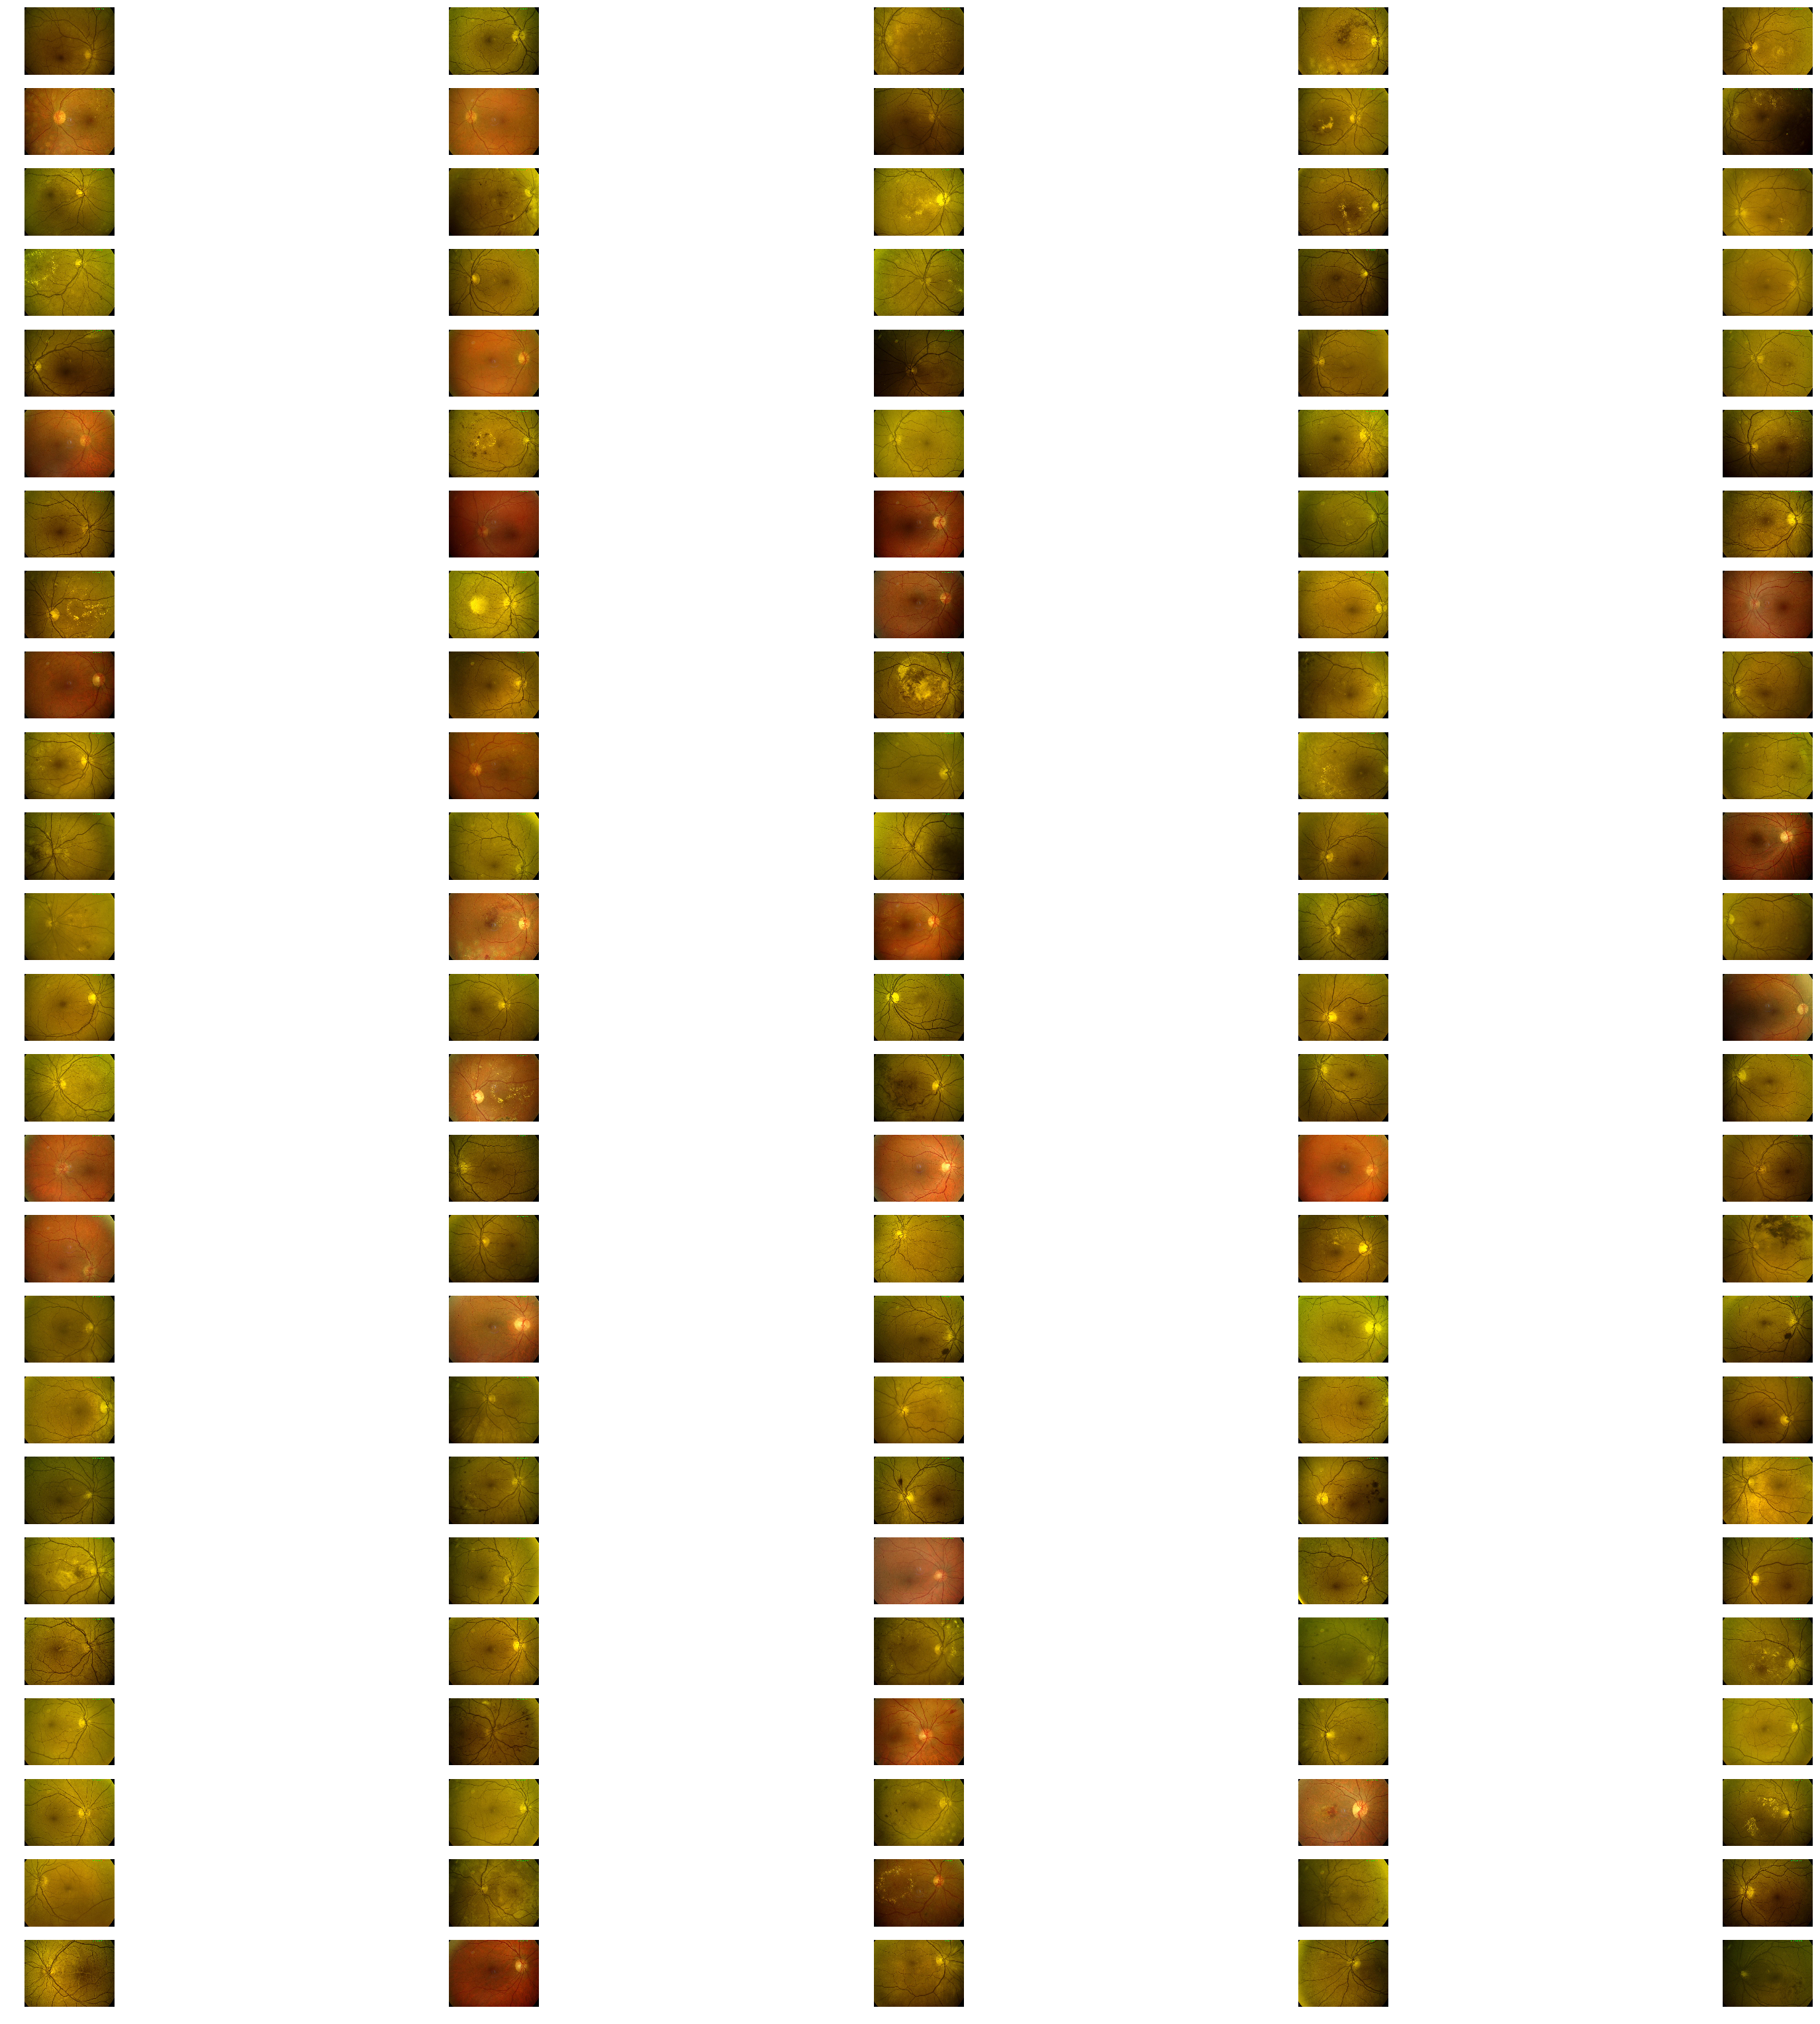

In [34]:
fig=plt.figure(figsize=(50, 50),dpi= 80, facecolor='w', edgecolor='k')
columns = 5
rows = 25
for i,j in zip(range(1, columns*rows +1),good_img_list):
    img = cv2.imread(j)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig.add_subplot(rows, columns, i)
    plt.axis("off")
    plt.imshow(img)
plt.show()

In [ ]:
for im in good_img_list[:10]:
    im_1 = cv2.imread(im)
    im_1 = cv2.cvtColor(im_1, cv2.COLOR_BGR2RGB)
    plt.figure()
    plt.imshow(im_1)
    plt.show()

In [35]:
size = []
no_of_bands = []
for im in outlier_img_list:
    image = cv2.imread(im)
    size_im = [image.shape[0],image.shape[1]]
    bands = image.shape[2]
    size.append(size_im)
    no_of_bands.append(bands)

In [36]:
size

[[570, 760],
 [570, 760],
 [570, 760],
 [1704, 2272],
 [570, 760],
 [570, 760],
 [570, 760],
 [1704, 2272],
 [1704, 2272],
 [570, 760],
 [570, 760],
 [570, 760],
 [570, 760],
 [570, 760],
 [570, 760],
 [570, 760],
 [570, 760],
 [570, 760],
 [570, 760],
 [570, 760],
 [570, 760],
 [570, 760]]

(570, 760)


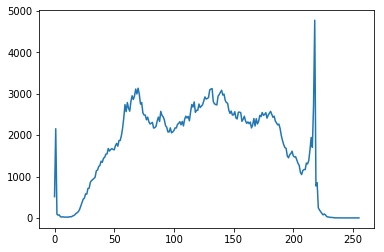

In [37]:
img = cv2.imread(outlier_img_list[4],0)
#img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
print img.shape
histr = cv2.calcHist([img],[0],None,[256],[0,256]) 
  
# show the plotting graph of an image 
plt.plot(histr) 
plt.show() 

In [ ]:
#def classWiseMeanAndHist(input_class):
#    w,h = Image.open(input_class[0]).size
#    N=len(input_class)
#    
#    arr=np.zeros((h,w,2),np.float)
#    print arr.shape
#    
#    for im in input_class:
#        imarr=np.array(Image.open(im).convert('LA'),dtype=np.float)
#        #print imarr.shape
#        arr=arr+imarr/N
#
#    # Round values in array and cast as 8-bit integer
#    arr=np.array(np.round(arr),dtype=np.uint8)
#    #print arr
#    
#    out=Image.fromarray(arr)
#    out.save("Average.png")
#    out.show()

In [38]:
def classWiseMeanAndHist(input_class):
    h,w,d = cv2.imread(input_class[0]).shape
    N=len(input_class)
    
    arr=np.zeros((h,w,3),np.float)
    print arr.shape
    
    for im in input_class:
        image = cv2.imread(im)
        #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        imarr=np.array(image,dtype=np.float)
        #print imarr.shape
        arr=arr+imarr/N

    # Round values in array and cast as 8-bit integer
    arr=np.array(np.round(arr),dtype=np.uint8)
    #print arr
    
    
    img = cv2.cvtColor(arr, cv2.COLOR_RGB2GRAY)
    histr = cv2.calcHist([img],[0],None,[256],[0,256]) 
  
    # show the plotting graph of an image 
    plt.plot(histr) 
    plt.show() 
    
    img = cv2.cvtColor(arr, cv2.COLOR_BGR2RGB)
    plt.axis("off")
    plt.imshow(img)
    #out=Image.fromarray(arr)
    #out.save("Average.png")
    #out.show()

(570, 760, 3)


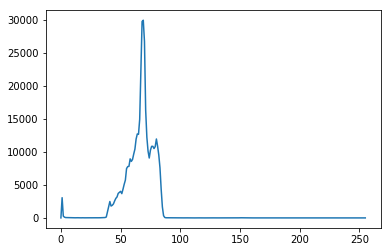

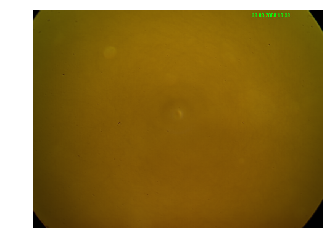

In [39]:
classWiseMeanAndHist(good_img_list)

In [ ]:
##Moving data into one
import shutil

In [ ]:
for im in outlier_img_list:
    shutil.copy(im, '/Users/arnav/Documents/DRIMDB/Combine/')

In [5]:
combine_im_list = glob.glob('/Users/arnav/Documents/DRIMDB/Combine/*.jpg')
combine_im_list = np.sort(combine_im_list)

In [51]:
class_id = []
for im in combine_im_list:
    print im.split('_')[1].split('(')[0]
    if im.split('_')[1].split('(')[0] == 'bad ':
        class_id.append(0)
    elif im.split('_')[1].split('(')[0] == 'good ':
        class_id.append(1)
    elif im.split('_')[1].split('(')[0] == 'outlier ':
        class_id.append(2)

bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
bad 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
good 
g

In [50]:
combine_im_list[70].split('_')[1].split('(')[0]

'good '

In [52]:
class_id

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [4]:
fea_det = cv2.xfeatures2d.SIFT_create()


In [13]:
des_list = []
for image in combine_im_list:
    im = cv2.imread(image)
    kpts = fea_det.detect(im)
    keypoints, descriptors = fea_det.detectAndCompute(im, None)
    des_list.append((image, descriptors))

In [14]:
des_list

[('/Users/arnav/Documents/DRIMDB/Combine/drimdb_bad (1).jpg',
  array([[  1.,  26., 104., ...,   0.,   0.,   0.],
         [  0.,   2.,  16., ...,  15.,   1.,   1.],
         [  0.,   1.,  14., ...,  50.,  61.,  39.],
         ...,
         [  1.,   1.,   0., ...,   0.,   0.,   0.],
         [  1.,   0.,   0., ...,   0.,   0.,   0.],
         [  0.,   0.,   0., ...,   0.,   0.,   0.]], dtype=float32)),
 ('/Users/arnav/Documents/DRIMDB/Combine/drimdb_bad (10).jpg',
  array([[32.,  2.,  7., ...,  0.,  0.,  0.],
         [43., 17.,  9., ...,  0.,  0.,  0.],
         [ 1.,  0.,  1., ..., 27.,  6., 13.],
         ...,
         [30.,  2.,  0., ...,  5.,  1.,  3.],
         [24.,  1.,  0., ..., 22.,  2.,  6.],
         [ 2.,  0.,  0., ..., 22.,  2., 10.]], dtype=float32)),
 ('/Users/arnav/Documents/DRIMDB/Combine/drimdb_bad (11).jpg',
  array([[  3.,   9.,   6., ...,  23.,   4.,   9.],
         [124.,  22.,   3., ...,  25.,   5.,   2.],
         [  1.,  19.,  12., ...,   1.,   0.,   3.],
    

In [16]:
descript_new = des_list[0][1]
for image_path, descriptor in des_list[1:]:
    descript_new = np.vstack((descript_new, descriptor))  # Stacking the descriptors


In [18]:
descript_new.shape

(67449, 128)

In [23]:
k = 500  # Number of clusters
voc, variance = kmeans(descript_new, k, 1)  

In [25]:
im_features = np.zeros((len(combine_im_list), k), "float32")
for i in xrange(len(combine_im_list)):
    words, distance = vq(des_list[i][1],voc)
    for w in words:
        im_features[i][w] += 1

In [40]:
# Perform Tf-Idf vectorization
nbr_occurences = np.sum( (im_features > 0) * 1, axis = 0)
# Calculating the number of occurrences
idf = np.array(np.log((1.0*len(combine_im_list)+1) / (1.0*nbr_occurences + 1)), 'float32')
# Giving weight to one that occurs more frequently

In [44]:
# Scaling the words
stdSlr = StandardScaler().fit(im_features)
im_features = stdSlr.transform(im_features)  # Scaling the visual words for better Prediction


In [45]:
im_features

array([[-0.32972643, -0.5683331 , -0.4880374 , ..., -0.41308945,
        -0.44196877, -0.49911848],
       [-0.32972643, -0.5683331 , -0.4880374 , ..., -0.41308945,
        -0.44196877, -0.49911848],
       [-0.32972643, -0.5683331 , -0.4880374 , ..., -0.41308945,
        -0.44196877, -0.49911848],
       ...,
       [-0.32972643, -0.5683331 ,  0.27035168, ...,  2.536574  ,
        -0.44196877,  2.3133056 ],
       [-0.32972643, -0.5683331 , -0.4880374 , ..., -0.41308945,
        -0.44196877, -0.49911848],
       [-0.32972643, -0.5683331 , -0.4880374 , ..., -0.41308945,
        -0.44196877, -0.49911848]], dtype=float32)

In [46]:
im_features.shape

(216, 500)

In [58]:
#split data into test and train

X_train, X_test, y_train, y_test = train_test_split(im_features, class_id, test_size=0.20, random_state=42)

In [67]:
clf = SVC() # make classifier object
clf.fit(X_train, y_train) # train the model
classes = clf.predict(X_test) #returns a list of prediction for each test_data

In [68]:
classes

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [70]:
y_test

[2,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 2,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

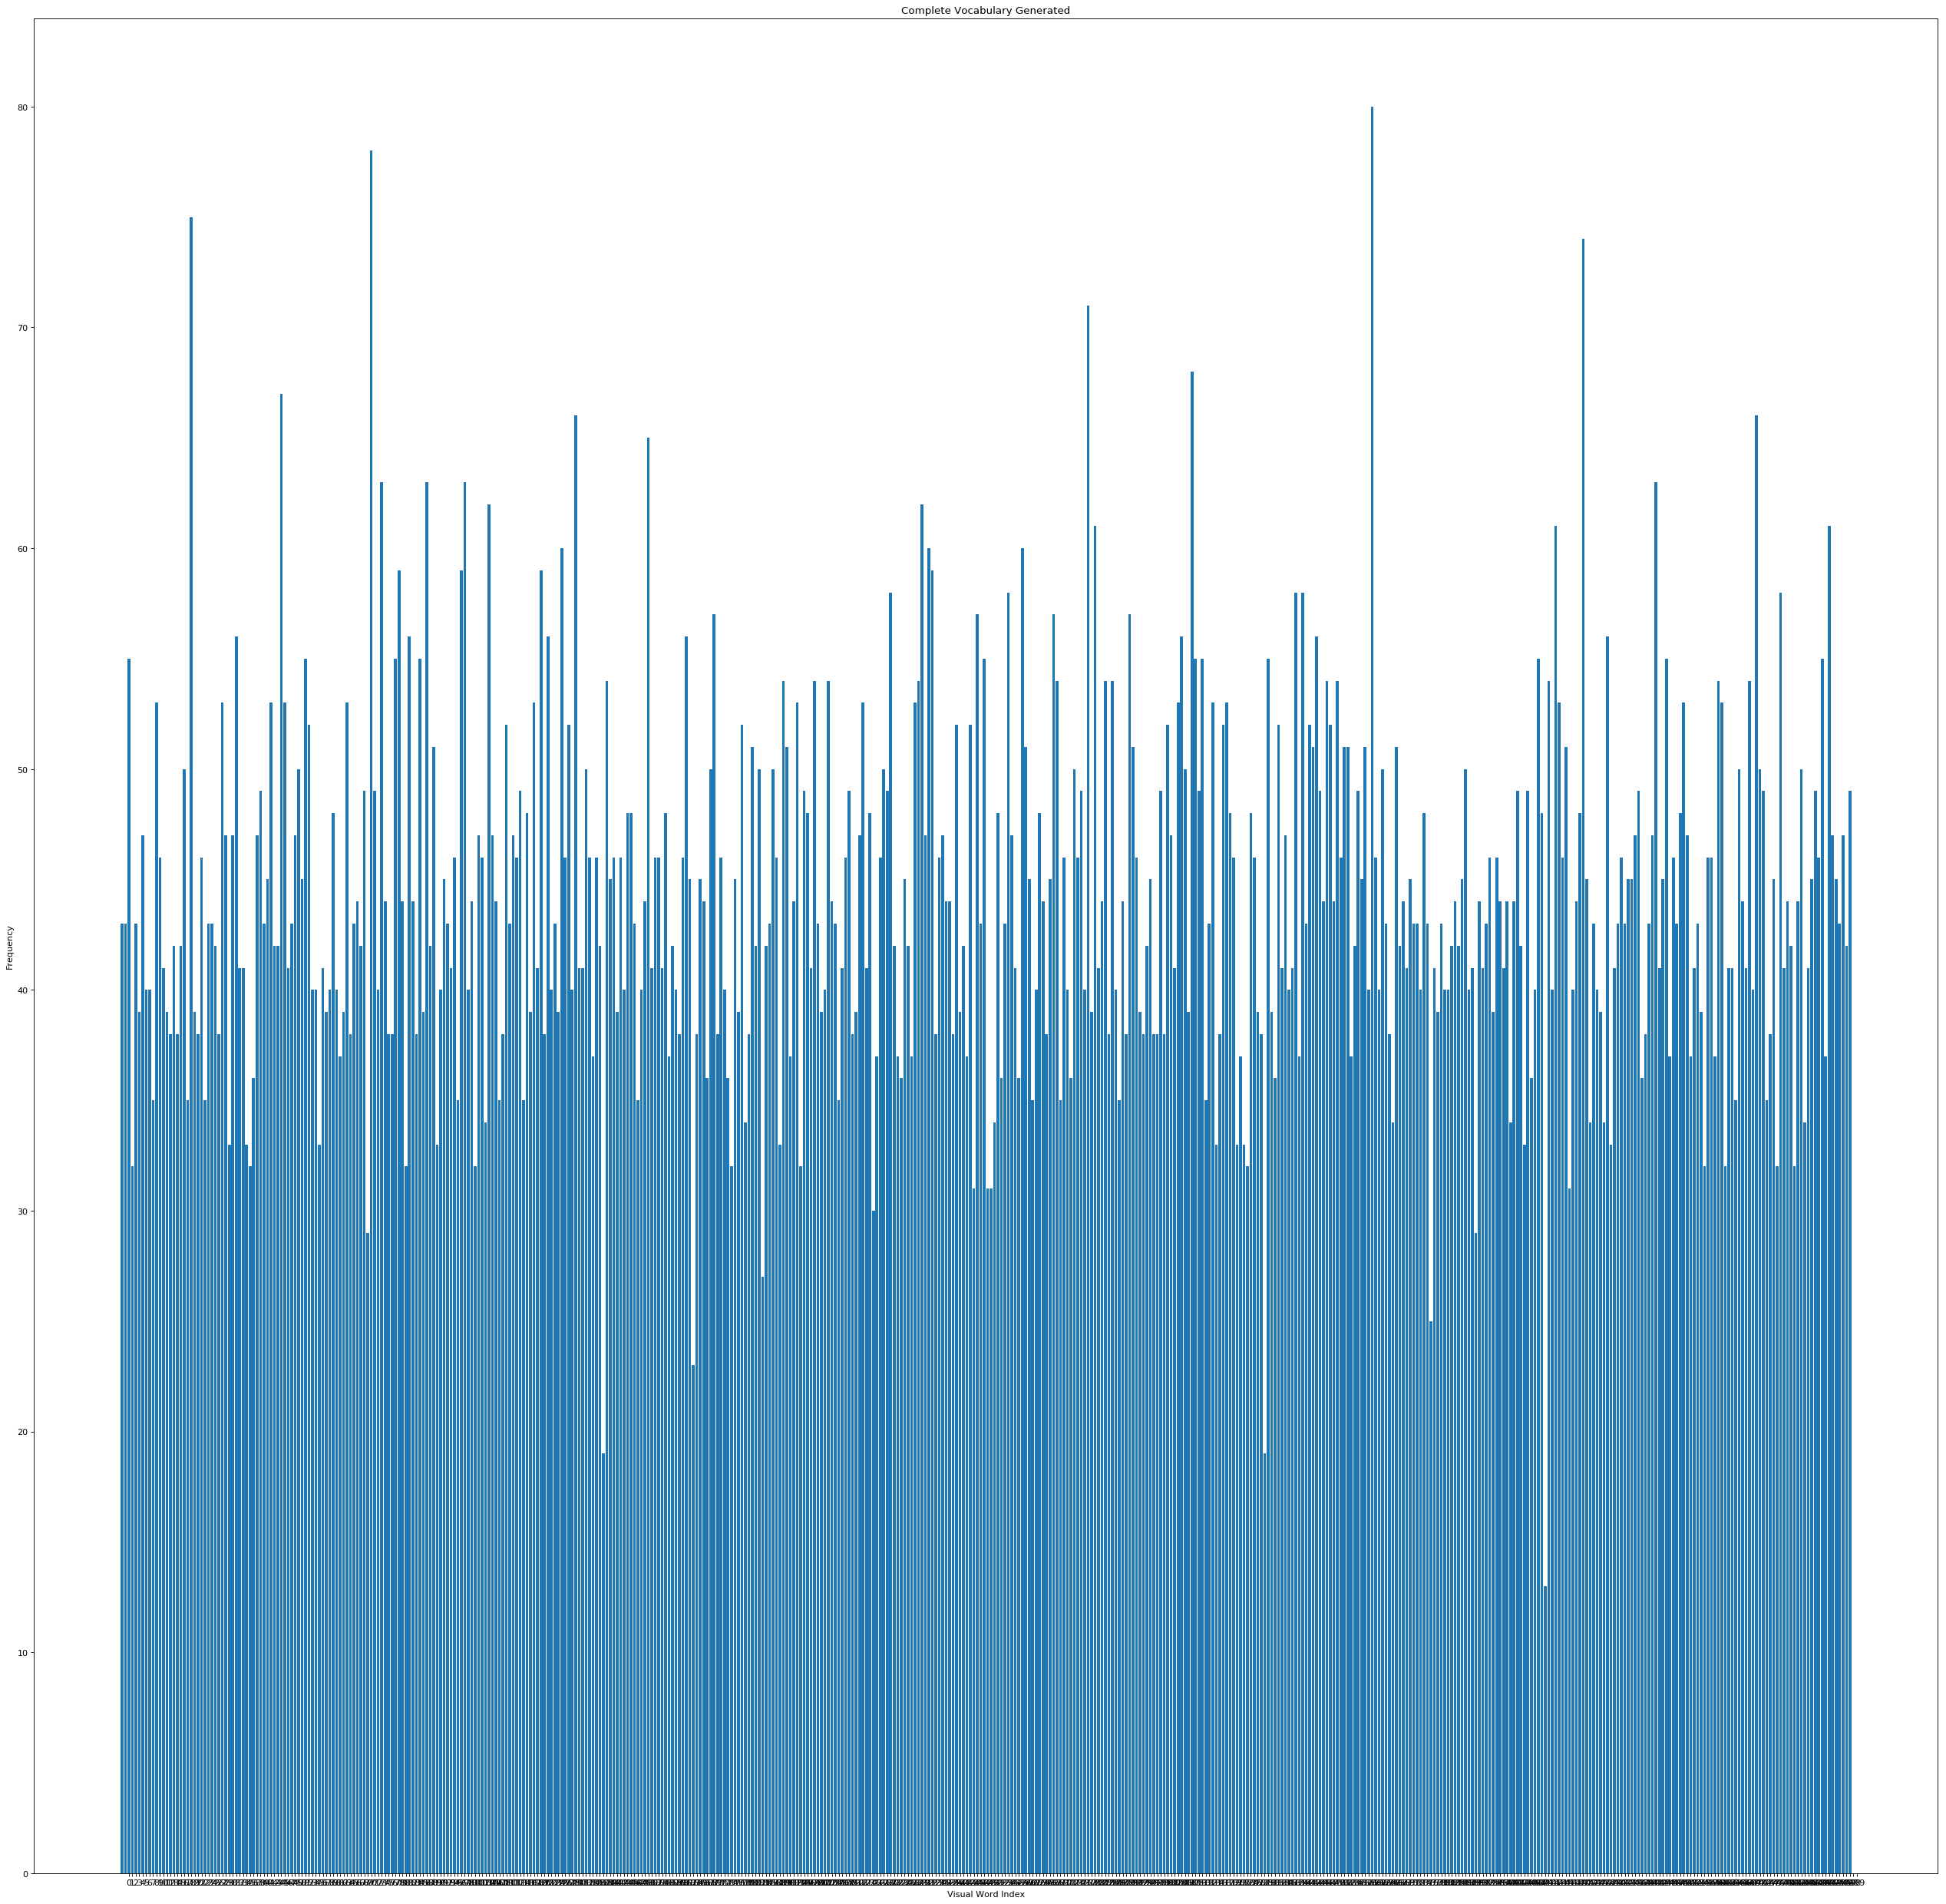

In [77]:
#visualise word index
vocabulary = im_features
x_scalar = np.arange(500)
y_scalar = np.array([abs(np.sum(vocabulary[:,h], dtype=np.int32)) for h in range(500)])
#print y_scalar
fig=plt.figure(figsize=(40, 40), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(x_scalar, y_scalar)
plt.xlabel("Visual Word Index")
plt.ylabel("Frequency")
plt.title("Complete Vocabulary Generated")
plt.xticks(x_scalar + 2.0, x_scalar)
plt.show()